In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 

# create an intemittent signal with a linear trend
def create_intermittent_signal(N):
    sig = [k/ N for k in range(N)]
    for i in range(1, N // 30):
        if(np.random.random() < 0.5):
            sig[i * 30] = sig[i * 30] + 0.5 * np.random.random()
    return sig


In [2]:
N = 365
np.random.seed(seed=1960)
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : create_intermittent_signal(N)})
    # print(df_train.head(N))


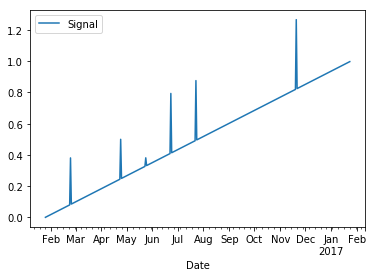

In [3]:
df_train.plot('Date' , ['Signal'])

INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 6.317538022994995
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-05T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Min=0.0 Max=1.266137302004588  Mean=0.5035973703201568 StdDev=0.2908435821956897
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=0.0 Max=1.266137302004588  Mean=0.5035973703201568 StdDev=0.2908435821956897
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_zeroCycle_residue_CROSTON(0.1)' [LinearTrend + NoCycle + CROSTON]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_LinearTrend_residue_zeroCycle_residue_CROSTON(0.1)' [CROSTON]
INFO:pyaf.std:MODEL_MAPE MA

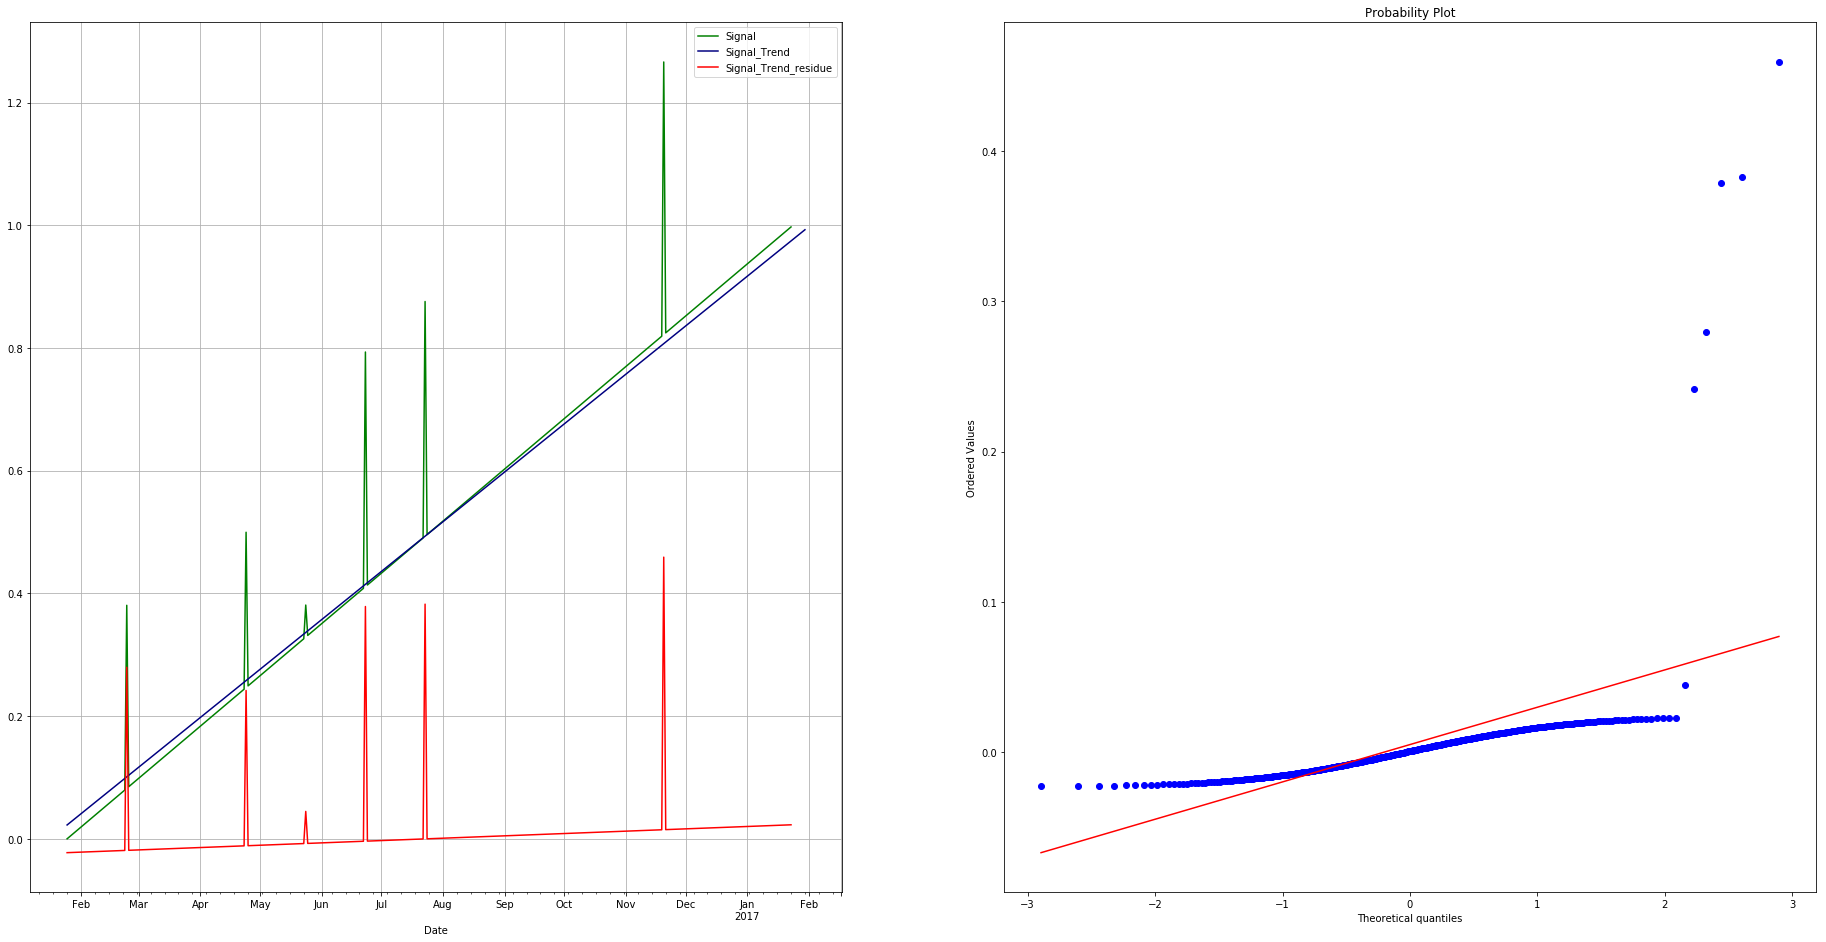

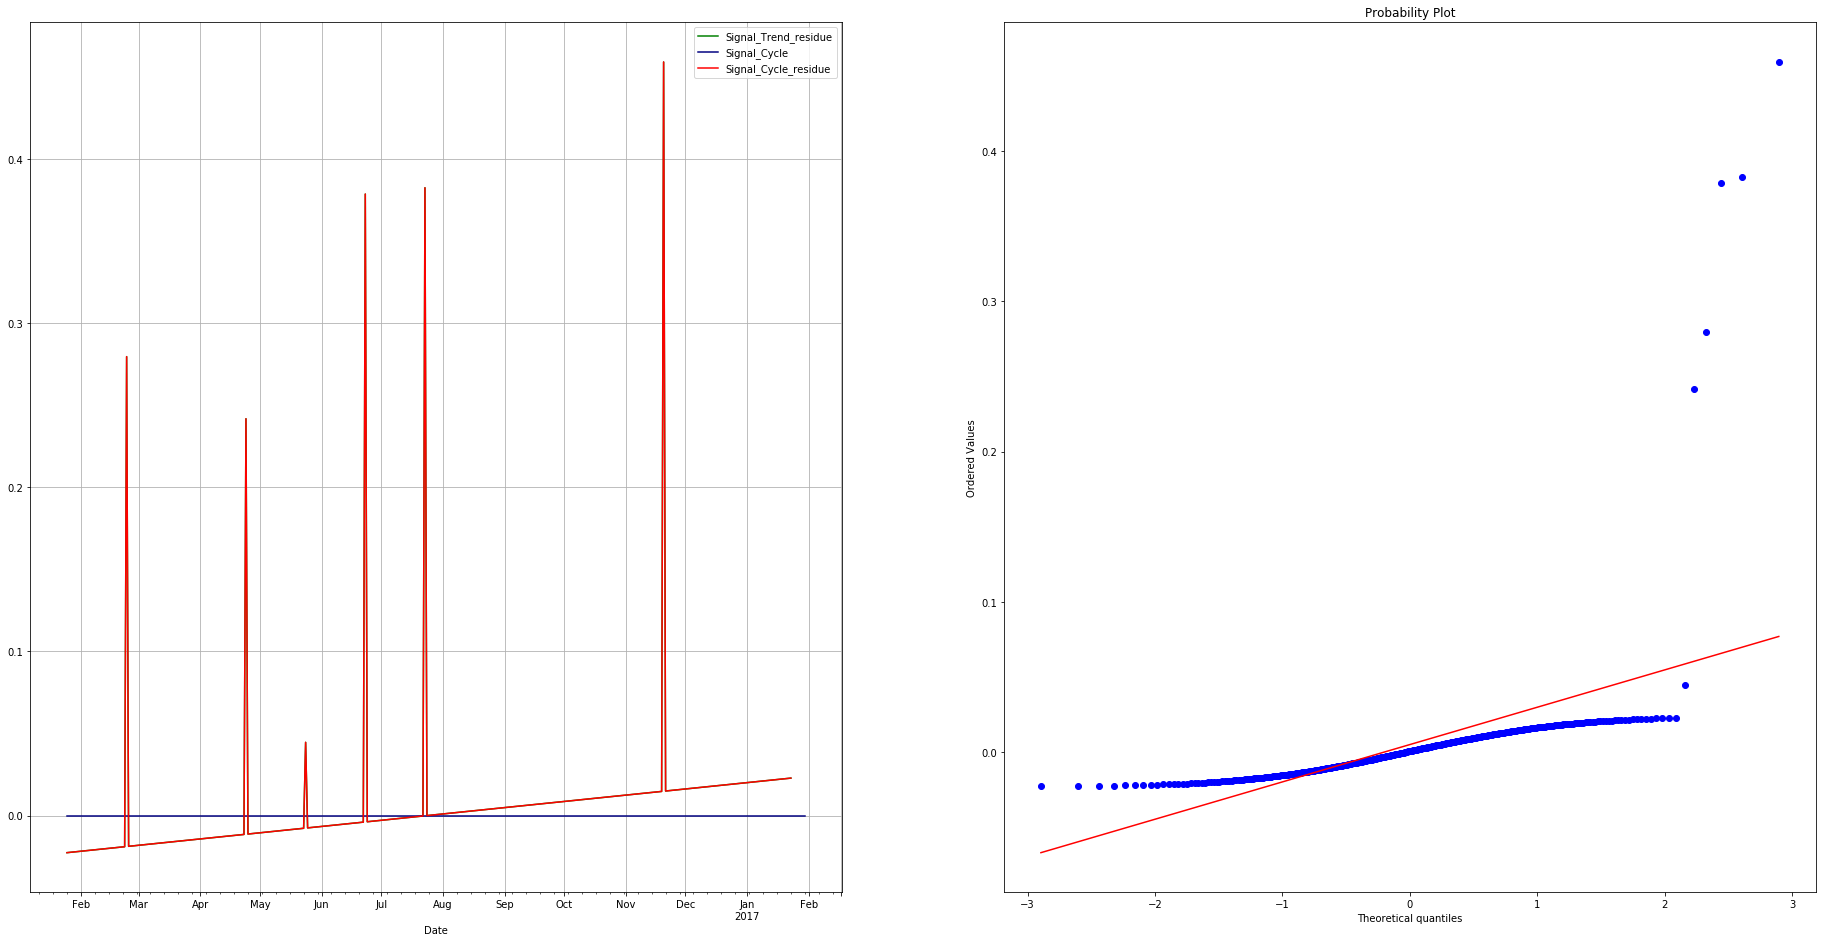

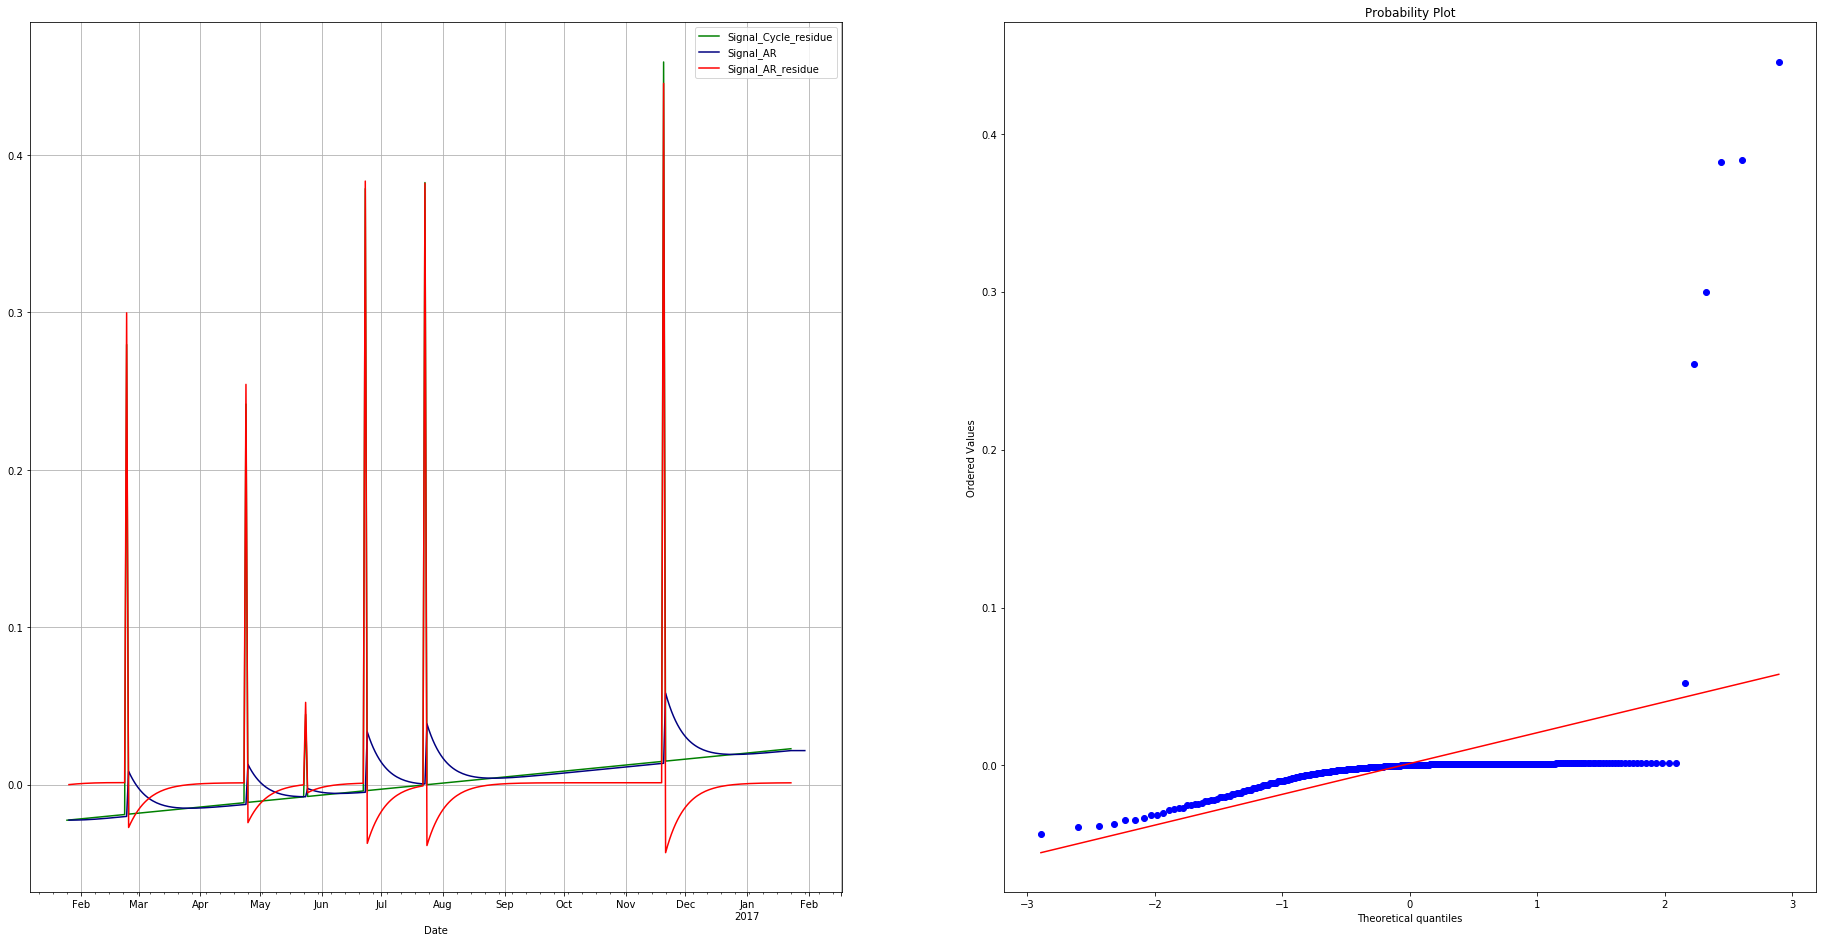

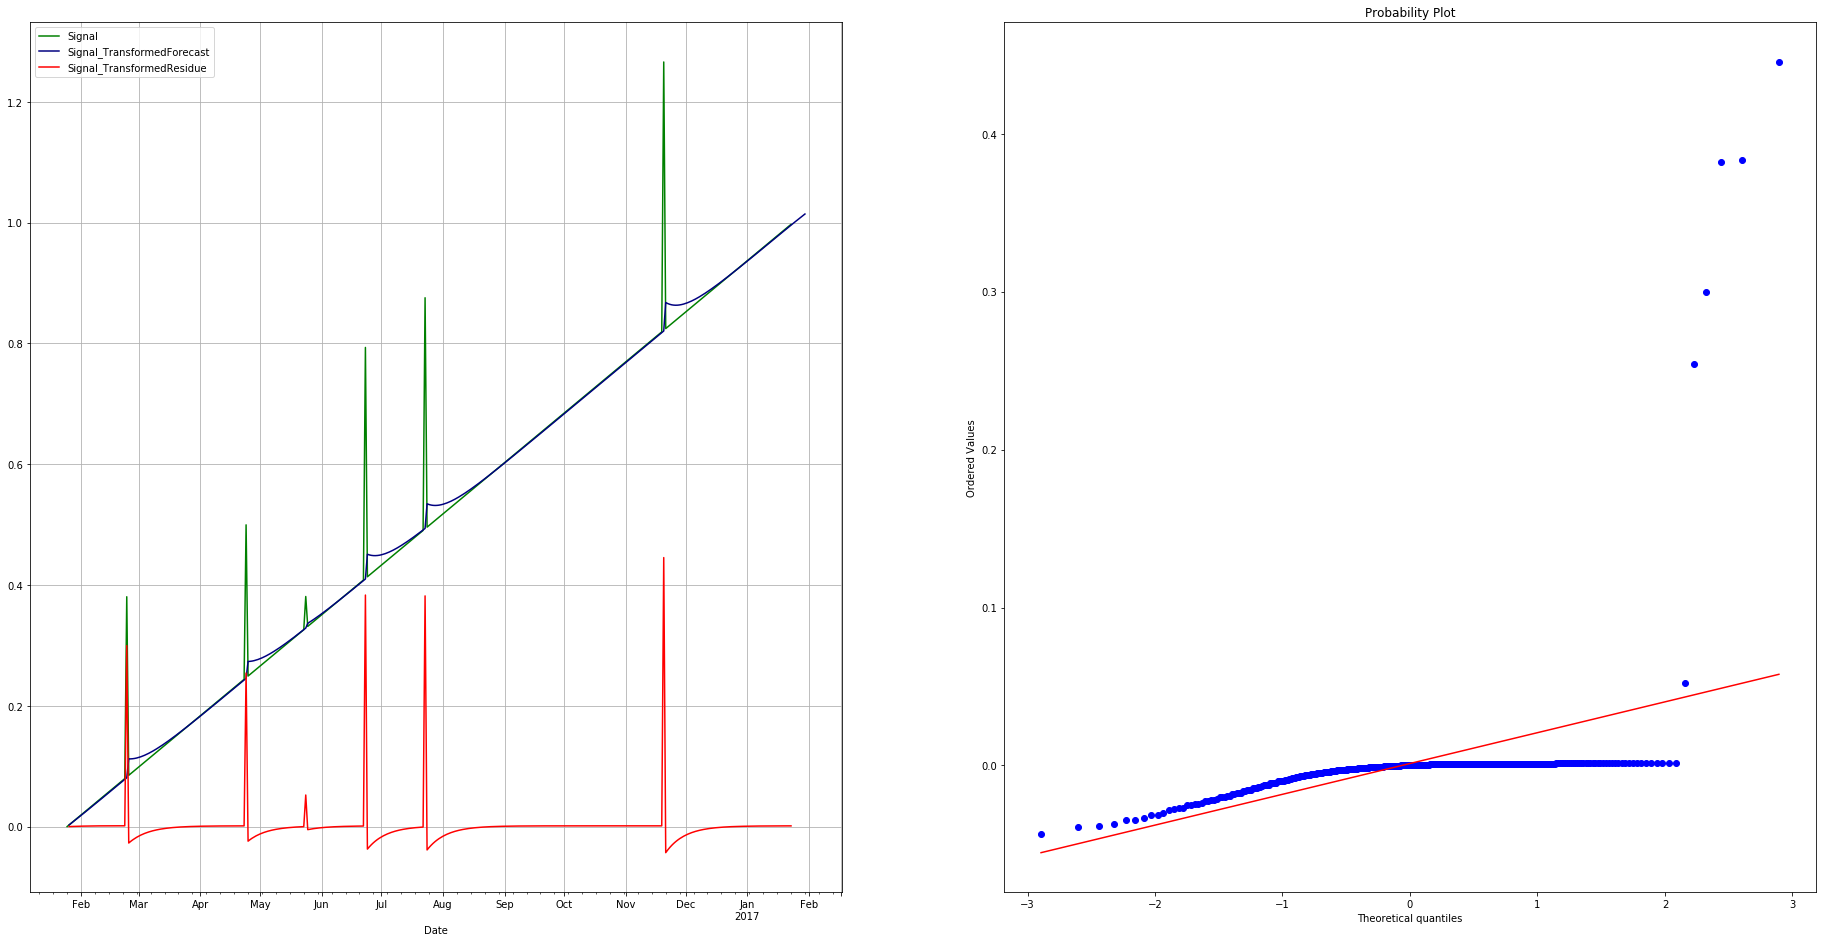

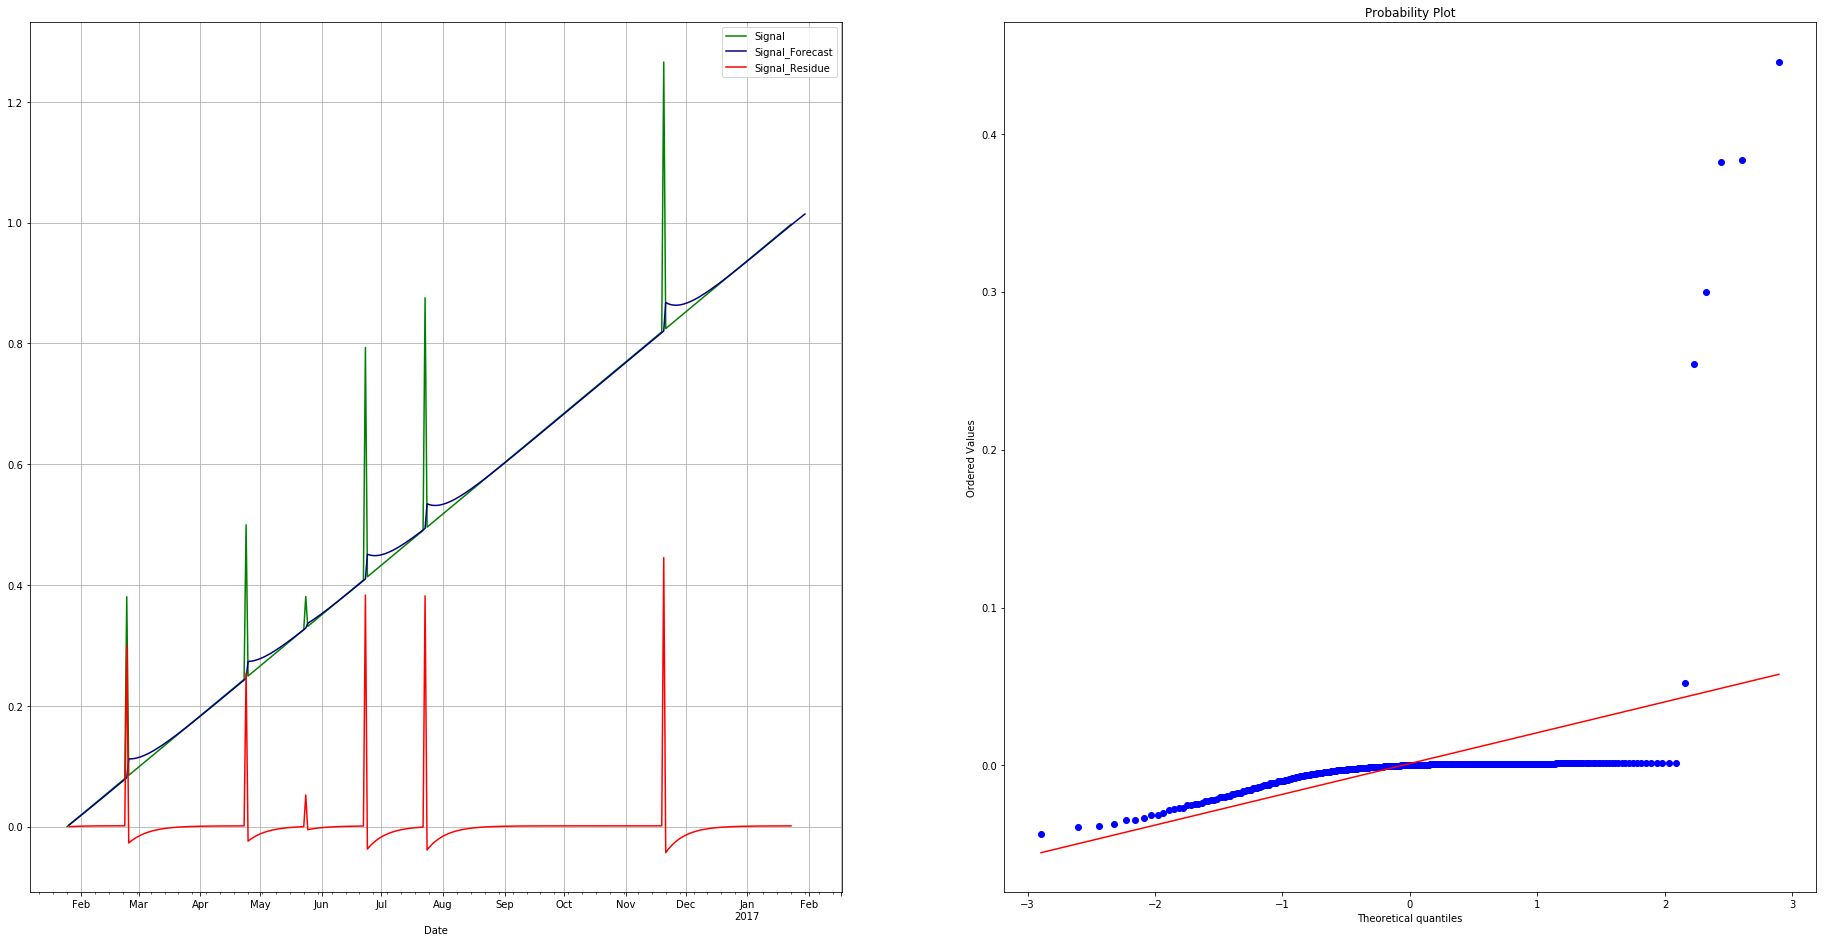

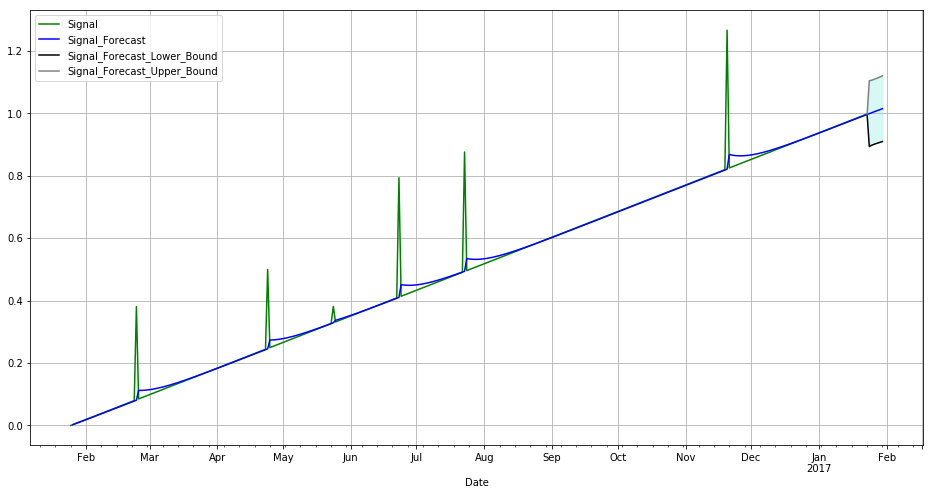

In [5]:

import pyaf.ForecastEngine as autof
lEngine = autof.cForecastEngine()

lEngine.mOptions.set_active_trends(['LinearTrend'])
lEngine.mOptions.set_active_periodics(['None'])
lEngine.mOptions.set_active_transformations(['None'])
lEngine.mOptions.set_active_autoregressions(['CROSTON'])
lEngine.mOptions.mModelSelection_Criterion = "L2";
lEngine.mOptions.mCrostonOptions.mMethod = None
lEngine.mOptions.mCrostonOptions.mZeroRate = 0.0
# lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV"

lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);

lEngine.getModelInfo()
    
lEngine.standardPlots();
